In [3]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("Path to dataset files:", path)


Path to dataset files: /Users/syonaa/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [5]:
data_path = os.path.join(path, "spam.csv") 

df = pd.read_csv(data_path, encoding='latin-1')

df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['label'].value_counts()


ham     4825
spam     747
Name: label, dtype: int64

In [9]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 3.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/syonaa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syonaa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens


In [12]:
def get_top_ngrams(texts, n=1, top_k=10):
    ngram_counter = Counter()
    for text in texts:
        tokens = preprocess_text(text)
        n_grams = ngrams(tokens, n)
        ngram_counter.update(n_grams)
    return ngram_counter.most_common(top_k)


In [13]:
ham_texts = df[df['label'] == 'ham']['message']
spam_texts = df[df['label'] == 'spam']['message']

# Unigrams
print("Top 10 Ham Unigrams:")
print(get_top_ngrams(ham_texts, 1))

print("\nTop 10 Spam Unigrams:")
print(get_top_ngrams(spam_texts, 1))

# Bigrams
print("\nTop 10 Ham Bigrams:")
print(get_top_ngrams(ham_texts, 2))

print("\nTop 10 Spam Bigrams:")
print(get_top_ngrams(spam_texts, 2))

# Trigrams
print("\nTop 10 Ham Trigrams:")
print(get_top_ngrams(ham_texts, 3))

print("\nTop 10 Spam Trigrams:")
print(get_top_ngrams(spam_texts, 3))


Top 10 Ham Unigrams:
[(('u',), 979), (('gt',), 318), (('lt',), 316), (('get',), 301), (('go',), 248), (('ok',), 245), (('got',), 242), (('ur',), 237), (('know',), 236), (('like',), 231)]

Top 10 Spam Unigrams:
[(('call',), 346), (('free',), 219), (('txt',), 156), (('ur',), 144), (('u',), 141), (('mobile',), 123), (('text',), 121), (('stop',), 114), (('claim',), 113), (('reply',), 104)]

Top 10 Ham Bigrams:
[(('lt', 'gt'), 276), (('gon', 'na'), 58), (('call', 'later'), 50), (('let', 'know'), 39), (('sorry', 'call'), 38), (('r', 'u'), 37), (('u', 'r'), 35), (('good', 'morning'), 31), (('take', 'care'), 31), (('u', 'wan'), 29)]

Top 10 Spam Bigrams:
[(('please', 'call'), 45), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('call', 'landline'), 22), (('selected', 'receive'), 19), (('send', 'stop'), 19), (('every', 'week'), 19), (('await', 'collection'), 19), (('call', 'claim'), 18)]

Top 10 Ham Trigrams:
[(('sorry', 'call', 'later'), 38), (('lt', 'decima

In [14]:
def generate_wordcloud(texts, title):
    all_tokens = []
    for text in texts:
        tokens = preprocess_text(text)
        all_tokens.extend(tokens)
    text_str = ' '.join(all_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_str)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


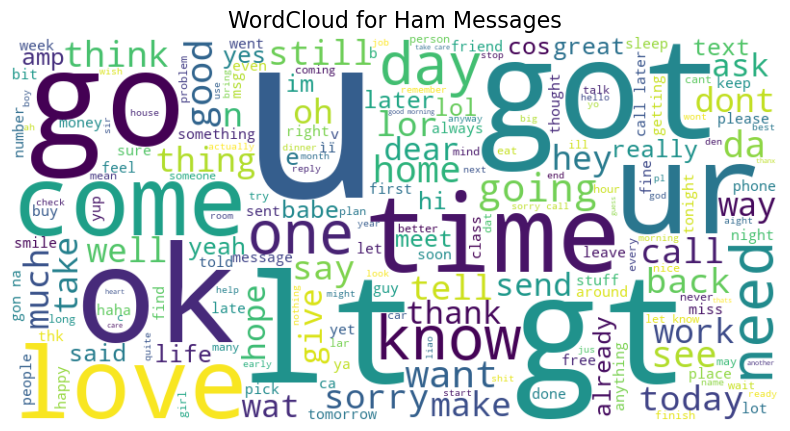

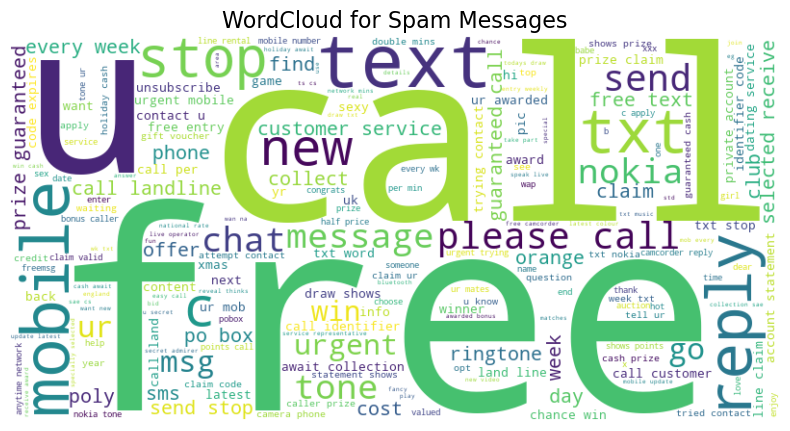

In [15]:
generate_wordcloud(ham_texts, "WordCloud for Ham Messages")
generate_wordcloud(spam_texts, "WordCloud for Spam Messages")


In [ ]:
#Bag of Words Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np


In [18]:
X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})  


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)


In [21]:
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)

y_pred_bow = model_bow.predict(X_test_bow)

f1_bow = f1_score(y_test, y_pred_bow)
print(f"F1 Score (Bag-of-Words): {f1_bow:.4f}")


F1 Score (Bag-of-Words): 0.9247


In [22]:
#Tf-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
vectorizer_tfidf = TfidfVectorizer()

X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


In [25]:
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test, y_pred_tfidf)
print(f"F1 Score (TF-IDF): {f1_tfidf:.4f}")


F1 Score (TF-IDF): 0.8848


In [33]:
!python -m spacy download en_core_web_sm


/Users/syonaa/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 638.1 kB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [35]:
import re
from bs4 import BeautifulSoup
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syonaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def clean_text(text):
    text = text.lower()

    text = BeautifulSoup(text, "html.parser").get_text()

    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha]

    return " ".join(tokens)


In [37]:
df['clean_message'] = df['message'].apply(clean_text)


/var/folders/wv/6mym4l8x2m103zryzwg2jgzw0000gn/T/ipykernel_70611/3921558617.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [41]:
df

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah I think go usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time try contact u u win å pound prize clai...
5568,ham,Will Ì_ b going to esplanade fr home?,ì b go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching I act like I interested buy somet...


In [38]:
X_clean = df['clean_message']
y = df['label'].map({'ham': 0, 'spam': 1})

X_train_clean, X_test_clean, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)


In [39]:
vectorizer_clean = TfidfVectorizer()
X_train_clean_tfidf = vectorizer_clean.fit_transform(X_train_clean)
X_test_clean_tfidf = vectorizer_clean.transform(X_test_clean)


In [40]:
model_clean = LogisticRegression(max_iter=1000)
model_clean.fit(X_train_clean_tfidf, y_train)

y_pred_clean = model_clean.predict(X_test_clean_tfidf)

f1_clean = f1_score(y_test, y_pred_clean)
print(f"F1 Score (TF-IDF + Preprocessing): {f1_clean:.4f}")


F1 Score (TF-IDF + Preprocessing): 0.8517


In [42]:
import pandas as pd

scores_df = pd.DataFrame({
    "Method": [
        "Bag-of-Words (CountVectorizer)",
        "TF-IDF (No Preprocessing)",
        "TF-IDF (With Preprocessing)"
    ],
    "F1-Score": [
        round(f1_bow, 4),
        round(f1_tfidf, 4),
        round(f1_clean, 4)
    ]
})

print("Final Model Comparison (F1-Scores):")
display(scores_df)


Final Model Comparison (F1-Scores):


,Method,F1-Score
0,Bag-of-Words (CountVectorizer),0.9247
1,TF-IDF (No Preprocessing),0.8848
2,TF-IDF (With Preprocessing),0.8517
